In [8]:
from src.preprocessing.dataLoader_CelebA import get_partitioned_dataloaders, create_subset_loader
from src.ml.resNet50 import SiameseResNet
from src.ml.losses_utils import ContrastiveLoss
import torch
from src.ml.hyperparam_study import run_optuna_study

# 1. Load the data

In [9]:
IMAGE_DIR = "data/celeba/img_align_celeba"
LABEL_FILE = "data/celeba/identity_CelebA.txt"
PARTITION_FILE = "data/celeba/list_eval_partition.csv"
IMG_SIZE = 224
BATCH_SIZE = 32
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [10]:
train_loader, val_loader, test_loader = get_partitioned_dataloaders(image_dir= IMAGE_DIR,
                                                               label_file= LABEL_FILE,
                                                               partition_file= PARTITION_FILE,
                                                               batch_size=BATCH_SIZE,
                                                               img_size=IMG_SIZE)


Label: tensor([0.])


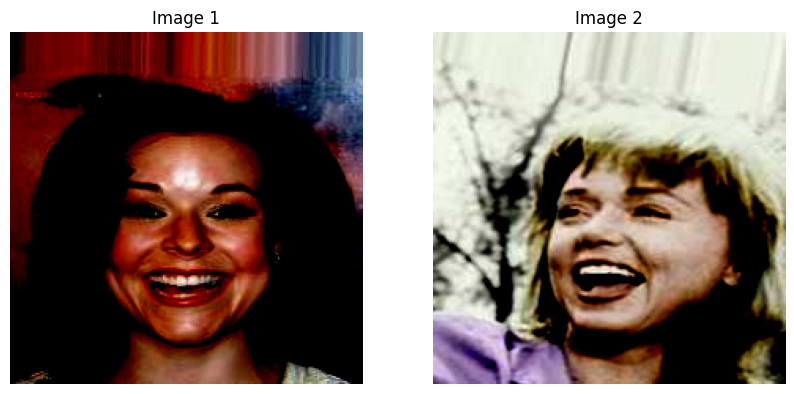

In [11]:
# Get one sample from the dataloader
dataiter = iter(test_loader)
img1, img2, label = next(dataiter)

# If you want to visualize the images, you can use matplotlib
import matplotlib.pyplot as plt

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# For each image, we need to move the channels to the end and convert to numpy
# Assuming the images are in format (batch_size, channels, height, width)
img1_display = img1[0].permute(1, 2, 0).cpu().numpy()
img2_display = img2[0].permute(1, 2, 0).cpu().numpy()
print("\nLabel:", label[0])
# Display images
ax1.imshow(img1_display)
ax1.set_title('Image 1')
ax1.axis('off')

ax2.imshow(img2_display)
ax2.set_title('Image 2')
ax2.axis('off')

plt.show()

# Create the model

In [12]:
model = SiameseResNet()

# Find best Hyperparameters

In [ ]:
train_loader_study = (create_subset_loader(train_loader,10000))
val_loader_study = (create_subset_loader(train_loader,2000))
run_optuna_study(train_loader_study, val_loader_study, n_trials=10, study_name="siamese_constrastive_HP_study")

# Train Model

In [13]:
optimizer = torch.optim.AdamW(model.parameters(), lr = 0.00001)

In [14]:
results = model.train_model_constructive(
        train_loader=create_subset_loader(train_loader,100),
        val_loader=create_subset_loader(val_loader,100),
        criterion=ContrastiveLoss(),
        optimizer=optimizer,
        num_epochs=5,
        device=DEVICE,
        patience=5,
        experiment_name='SiameseResNet',
        tuning_mode=False
    )

KeyboardInterrupt: 

# Plot the results

In [ ]:
! mlflow ui --port 5000